## Contents
### 1. Importing libraries & data preprocessing
### 2. Application of Models
   #### 2.1. Logistic Regression
   #### 2.2. Decision Tree
   #### 2.3. Random Forest
   #### 2.4. Adaboost
   #### 2.5. XGBoost
   #### 2.6. LightGBM
   #### 2.7. Catboost
### 3. Final Comparison

### 1. Importing libraries & data preprocessing

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression # LR
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from xgboost import XGBClassifier # XGBM
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from  lightgbm import LGBMClassifier # Light GBM
from  catboost import CatBoostClassifier # CatBoost

# evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('../data/Churn_Modelling.csv',sep=',')

In [3]:
mean_age=round(df['Age'].mean())
df['Age'].fillna(value=mean_age,inplace=True)
df['HasCrCard'].mode()
df['HasCrCard'].fillna(value=1,inplace=True)
df['IsActiveMember'].mode()
df['IsActiveMember'].fillna(value=1,inplace=True)

In [5]:
X1=df.iloc[:,3:13] 

In [8]:
X_encoded = pd.get_dummies(X1, columns=['Geography', 'Gender'])
X_encoded
XE=X_encoded #Extra

One-hot encoding creates an additional column of features. This allows the magnitude to be used as a new set of data. By one-hot encoding Geography and Gender, it allows the training data to be of use. It can be further rescaled along with the rest of the other features.

In [9]:
scaler=StandardScaler()
X=scaler.fit_transform(X_encoded)

When handling multivariate data, StandardScaler is used. The data wil be transformed such that each individual features will have a mean of 0 and a standard deviation of 1. This ensures that the input data points are on the same scale for the MLM and ANN algorithms.

In [11]:
X = pd.DataFrame(X, index=X_encoded.index, columns=X_encoded.columns)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326465,0.293500,-1.041728,-1.226009,-0.911597,0.646000,0.970443,0.022008,0.997404,-0.578813,-0.573733,1.095967,-1.095967
1,-0.440270,0.198136,-1.387530,0.117274,-0.911597,-1.547987,0.970443,0.216663,-1.002603,-0.578813,1.742971,1.095967,-1.095967
2,-1.536934,0.293500,1.033084,1.333054,2.527132,0.646000,-1.030458,0.240817,0.997404,-0.578813,-0.573733,1.095967,-1.095967
3,0.501205,0.007408,-1.387530,-1.226009,0.807768,-1.547987,-1.030458,-0.108802,0.997404,-0.578813,-0.573733,1.095967,-1.095967
4,2.063434,0.388863,-1.041728,0.785694,-0.911597,0.646000,0.970443,-0.365171,-1.002603,-0.578813,1.742971,1.095967,-1.095967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.604664,-0.278684,0.687282,-1.226009,-0.911597,-1.547987,0.970443,-1.008565,0.997404,-0.578813,-0.573733,1.095967,-1.095967
9998,1.256455,0.293500,-0.695926,-0.022693,0.807768,0.646000,-1.030458,-0.125116,-1.002603,1.727675,-0.573733,-0.912436,0.912436
9999,1.256455,0.293500,-0.695926,-0.022693,0.807768,0.646000,-1.030458,-0.125116,-1.002603,1.727675,-0.573733,-0.912436,0.912436
10000,1.463373,-1.041595,-0.350124,0.859935,-0.911597,0.646000,-1.030458,-1.076294,0.997404,-0.578813,-0.573733,1.095967,-1.095967


A total of 13 features are used as input data to feed into the ML algorithms.

In [13]:
X.rename(columns = {'CreditScore':'credit'}, inplace = True)
X.rename(columns = {'Age':'age'}, inplace = True)
X.rename(columns = {'Tenure':'tenure'}, inplace = True)
X.rename(columns = {'Balance':'balance'}, inplace = True)
X.rename(columns = {'NumOfProducts':'products'}, inplace = True)
X.rename(columns = {'HasCrCard':'creditcard'}, inplace = True)
X.rename(columns = {'IsActiveMember':'active'}, inplace = True)
X.rename(columns = {'EstimatedSalary':'salary'}, inplace = True)
X.rename(columns = {'Geography_France':'France'}, inplace = True)
X.rename(columns = {'Geography_Germany':'Germany'}, inplace = True)
X.rename(columns = {'Geography_Spain':'Spain'}, inplace = True)
X.rename(columns = {'Gender_Female':'Female'}, inplace = True)
X.rename(columns = {'Gender_Male':'Male'}, inplace = True)

In [14]:
X

,credit,age,tenure,balance,products,creditcard,active,salary,France,Germany,Spain,Female,Male
0,-0.326465,0.293500,-1.041728,-1.226009,-0.911597,0.646000,0.970443,0.022008,0.997404,-0.578813,-0.573733,1.095967,-1.095967
1,-0.440270,0.198136,-1.387530,0.117274,-0.911597,-1.547987,0.970443,0.216663,-1.002603,-0.578813,1.742971,1.095967,-1.095967
2,-1.536934,0.293500,1.033084,1.333054,2.527132,0.646000,-1.030458,0.240817,0.997404,-0.578813,-0.573733,1.095967,-1.095967
3,0.501205,0.007408,-1.387530,-1.226009,0.807768,-1.547987,-1.030458,-0.108802,0.997404,-0.578813,-0.573733,1.095967,-1.095967
4,2.063434,0.388863,-1.041728,0.785694,-0.911597,0.646000,0.970443,-0.365171,-1.002603,-0.578813,1.742971,1.095967,-1.095967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.604664,-0.278684,0.687282,-1.226009,-0.911597,-1.547987,0.970443,-1.008565,0.997404,-0.578813,-0.573733,1.095967,-1.095967
9998,1.256455,0.293500,-0.695926,-0.022693,0.807768,0.646000,-1.030458,-0.125116,-1.002603,1.727675,-0.573733,-0.912436,0.912436
9999,1.256455,0.293500,-0.695926,-0.022693,0.807768,0.646000,-1.030458,-0.125116,-1.002603,1.727675,-0.573733,-0.912436,0.912436
10000,1.463373,-1.041595,-0.350124,0.859935,-0.911597,0.646000,-1.030458,-1.076294,0.997404,-0.578813,-0.573733,1.095967,-1.095967


In [17]:
y=df['Exited']

In [31]:
smote=SMOTE(random_state=1)
Xs,ys=smote.fit_resample(X,y)

Smote stands for Synthetic Minority Oversampling Technique. It is used to address imbalanced datasets such as this. It analyzes the data and creates synthetic samples of the minority data points in order to balance the data. By balancing the data, it allows the algorithms to learn the data better and increases the accuracy of the algorithm.

### 2. Application of Models

#### 2.1. Logistic Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.20, random_state=1)
lrmodel = LogisticRegression()
# Fit Model
lrmodel.fit(X_train,y_train)
#print(f"intercept: {model.intercept_}")
#print(f"slope: {model.coef_}")
# Score
y_pred = lrmodel.predict(X_test)
acc_score =accuracy_score(y_test,y_pred) #acc and normal score are the same
print(acc_score)
test_score=lrmodel.score(X_test,y_test)
print(test_score)
train_score=lrmodel.score(X_train,y_train)
print(train_score)

0.7024482109227872
0.7024482109227872
0.7131533511222728


In [49]:
y_pred_class = lrmodel.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1106  429]
 [ 519 1132]]


In [50]:
print(np.asarray([['TP', 'FP'], ['FN', 'TN']]))

[['TP' 'FP']
 ['FN' 'TN']]


Accuracy is:  0.7024482109227872
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1535
           1       0.73      0.69      0.70      1651

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



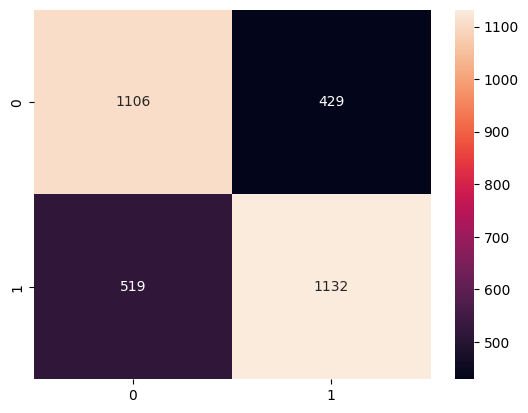

In [33]:
y_pred=lrmodel.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

This table shows the confusion matrix when Logistic Regression is applied. Top left represents the True Positive Rate, top right represents False Positive Rate, bottom left represents False Negative Rate and bottom right represents True Negative Rate.
Overall, Logistic Regression has an accuracy of about 0.7. It has relative good True Positive and True Negative Rate.

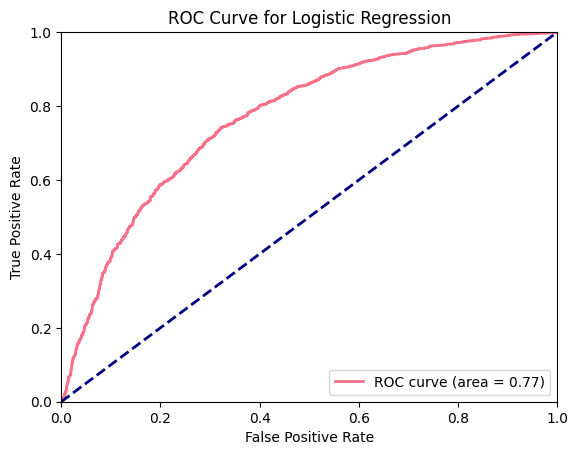

In [48]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = lrmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#f77189', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc = "lower right")
plt.show()

When plotting the Receiver Operating Characteristic(ROC) curve for Logistic Regression, it has an Area Under Curve(AUC) of 0.77.

#### 2.2. Decision Tree

In [36]:
dtmodel=DecisionTreeClassifier()

In [37]:
dtparam = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[1]}

In [40]:
grid_search = GridSearchCV(dtmodel, dtparam, cv=5, n_jobs=-1)

For the Decision Tree Classifier, grid search is first used to determine the best parameters to be used alongside. A Cross Validation(cv) of 5 is used to combine the averages to derive a slightly more accurate estimate of the grid search.

In [41]:
grid_search.fit(X_train,y_train)  

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [1], 'splitter': ['best', 'random']})

In [42]:
best_dtparams=grid_search.best_params_ #DONT RUN
best_dtparams 

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 1,
 'splitter': 'best'}

In [43]:
dtmodel=DecisionTreeClassifier(**best_dtparams)
dtmodel.fit(X_train,y_train)

y_pred = dtmodel.predict(X_test)

acc_score =accuracy_score(y_test,y_pred) #acc and normal score are the same
print(acc_score)
test_score=dtmodel.score(X_test,y_test)
print(test_score)
train_score=dtmodel.score(X_train,y_train)
print(train_score)

0.8198367859384809
0.8198367859384809
0.8681525663161199


Accuracy is:  0.8198367859384809
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1535
           1       0.83      0.82      0.82      1651

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



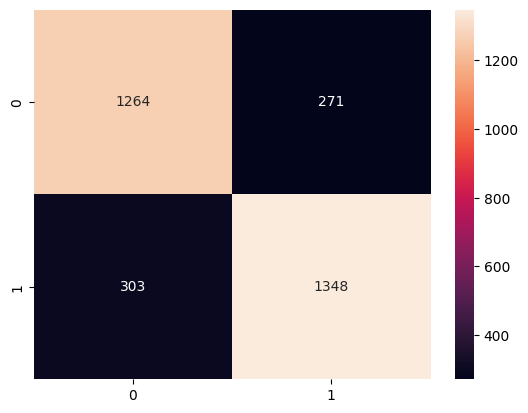

In [44]:
y_pred=dtmodel.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

When compared to Logistic Regression, Decision Tree has a better accuracy of 0.81.

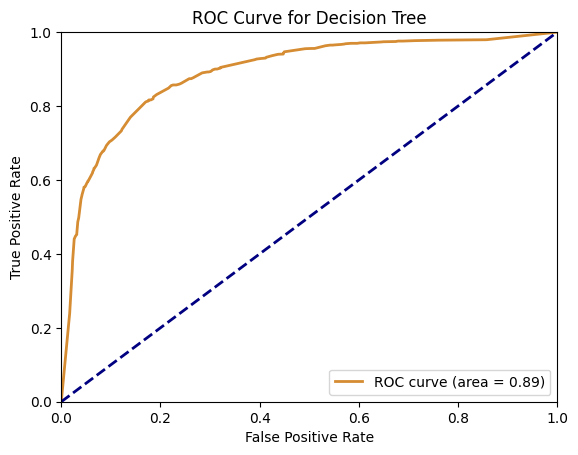

In [47]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = dtmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#d58c32', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc = "lower right")
plt.show()

#### 2.3. Random Forest

In [51]:
rfmodel=RandomForestClassifier()

In [52]:
rfparam = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [53]:
grid_search = GridSearchCV(rfmodel, rfparam, cv=5, n_jobs=-1)

Similar to Decision Tree Classfier, grid search is first used to determine the best parameters to be used alongside Random Forest.

In [54]:
grid_search.fit(X_train,y_train)   #LONG RUN

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

In [55]:
best_rfparams=grid_search.best_params_ #DONT RUN
best_rfparams                         

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 90}

In [71]:
rfmodel=RandomForestClassifier(**best_rfparams)
rfmodel.fit(X_train,y_train)

y_pred = rfmodel.predict(X_test)

acc_score =accuracy_score(y_test,y_pred) #acc and normal score are the same
print(acc_score)
test_score=rfmodel.score(X_test,y_test)
print(test_score)
train_score=rfmodel.score(X_train,y_train)
print(train_score)

0.8207784055241683
0.8207784055241683
0.8478260869565217


Accuracy is:  0.8207784055241683
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1535
           1       0.85      0.79      0.82      1651

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



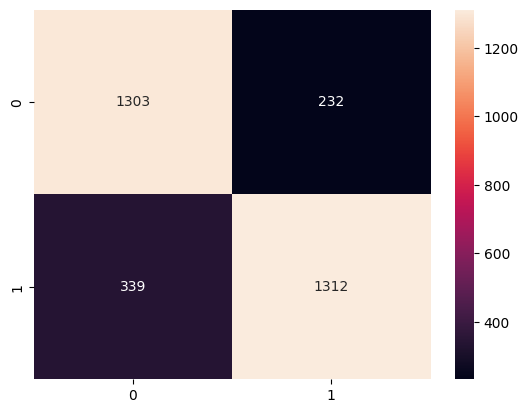

In [72]:
y_pred=rfmodel.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

Random Forest has an accuracy of about 0.82. It is relatively similar to Decision Tree. Both models used are much more accurate as compared to Logistic Regression.

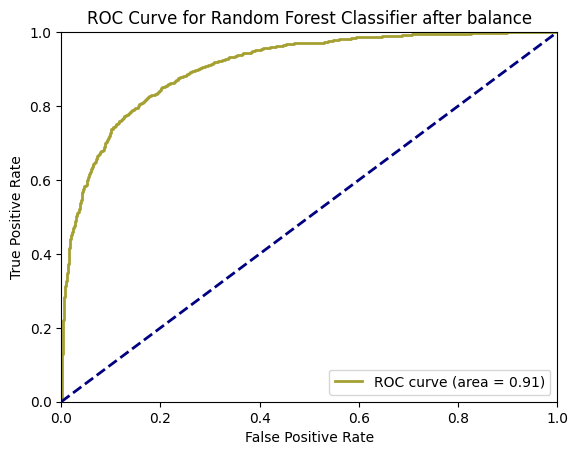

In [73]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = rfmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#a4a031', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier after balance')
plt.legend(loc = "lower right")
plt.show()

When we look at the AUC of Random Forest, it is significantly better than both the Decision Tree Classifier and Logistic Regression.

#### 2.4. Adaboost

In [74]:
ada=AdaBoostClassifier()

ada.fit(X_train,y_train)

y_pred=ada.predict(X_test)

acc_score =accuracy_score(y_test,y_pred) #acc and normal score are the same
print(acc_score)
test_score=ada.score(X_test,y_test)
print(test_score)
train_score=ada.score(X_train,y_train)
print(train_score)

0.8210922787193974
0.8210922787193974
0.8249882279077068


Accuracy is:  0.8210922787193974
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1535
           1       0.84      0.81      0.82      1651

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



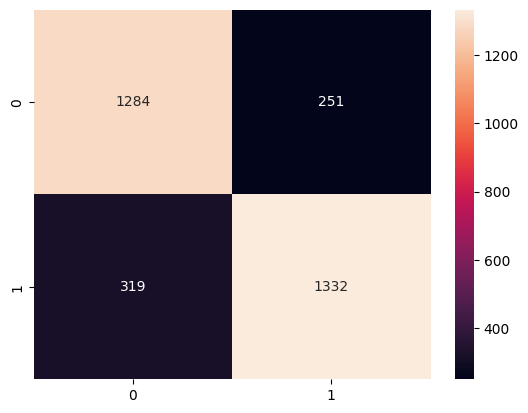

In [75]:
y_pred=ada.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

Adaboost is a gradient boosting technique which was initially created to increase efficiency of binary classifiers. Since the classification is also binary, we can use this.
Adaboost is a form of ensemble learning which aggregates multiple learners to improve predictive performance. When applied, Adaboost is relatively similar in performance as compared to Random Forest. It has an accuracy of about 0.82.

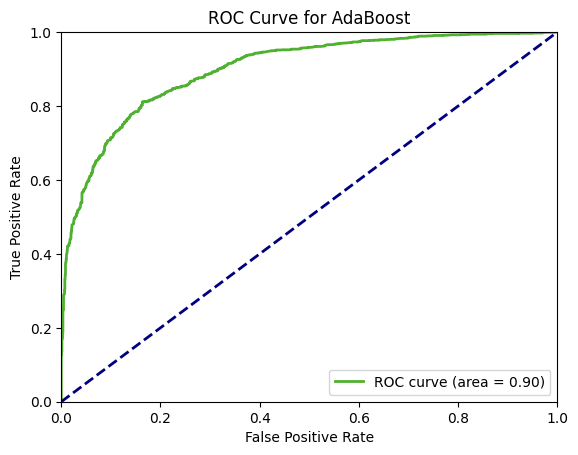

In [83]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = ada.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#50b131', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc = "lower right")
plt.show()

#### 2.5. XGBoost

In [77]:
xgb=XGBClassifier()

xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)

acc_score =accuracy_score(y_test,y_pred) #acc and normal score are the same
print(acc_score)
test_score=xgb.score(X_test,y_test)
print(test_score)
train_score=xgb.score(X_train,y_train)
print(train_score)

0.9023854362837413
0.9023854362837413
0.9627217077381887


Accuracy is:  0.9023854362837413
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1535
           1       0.93      0.88      0.90      1651

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



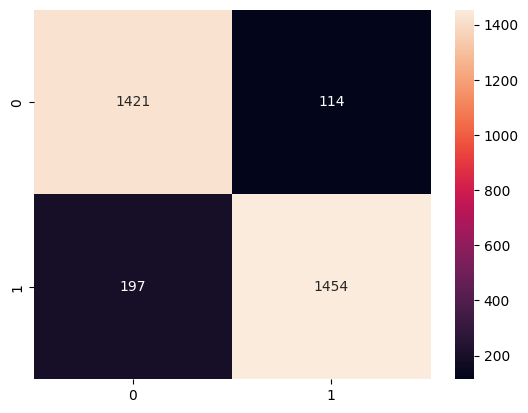

In [78]:
y_pred=xgb.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

XGBoost is another gradient boosting technique which is used. It has a high accuracy of 0.9. Both False Positive and Negative Rates are significantly lower as compared to previous algorithms.

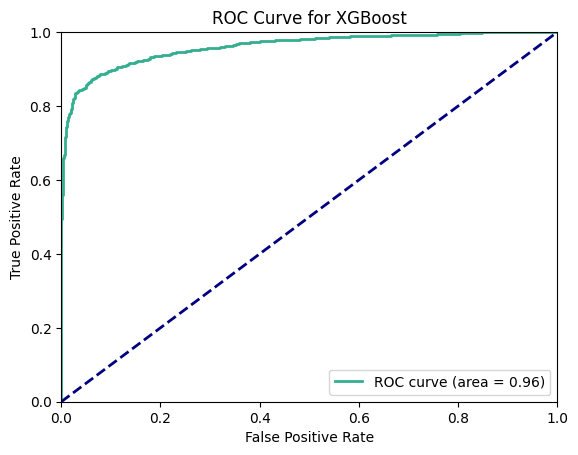

In [82]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = xgb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#34ae91', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc = "lower right")
plt.show()

#### 2.6. LightGBM

In [80]:
lgbm=LGBMClassifier()

lgbm.fit(X_train,y_train)

y_pred=lgbm.predict(X_test)

acc_score =accuracy_score(y_test,y_pred) #acc and normal score are the same
print(acc_score)
test_score=lgbm.score(X_test,y_test)
print(test_score)
train_score=lgbm.score(X_train,y_train)
print(train_score)

[LightGBM] [Info] Number of positive: 6313, number of negative: 6429
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1627
[LightGBM] [Info] Number of data points in the train set: 12742, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495448 -> initscore=-0.018208
[LightGBM] [Info] Start training from score -0.018208
0.9055241682360327
0.9055241682360327
0.931015539161827


Accuracy is:  0.9055241682360327
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1535
           1       0.93      0.88      0.91      1651

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



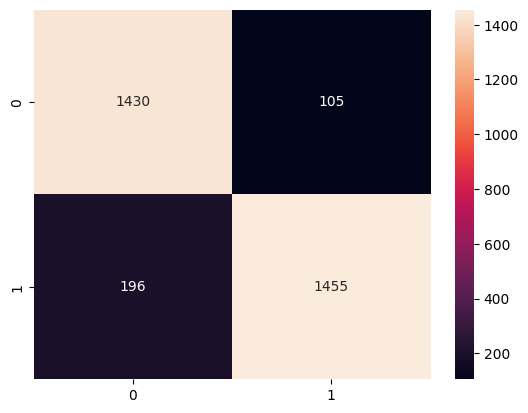

In [81]:
y_pred=lgbm.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

LightGBM is another gradient boosting algorithm. The advantages of using Light GBM is that it has a faster training speed and efficiency when handling larger datasets. Overall, it is relatively similar to XGBoost and it has an accuracy of 0.9.

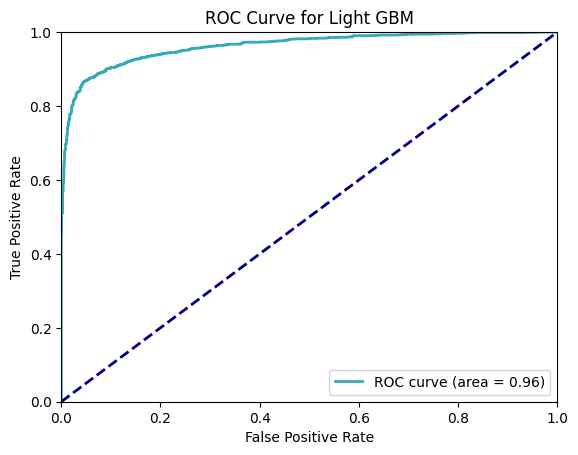

In [85]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = lgbm.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#37abb5', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Light GBM')
plt.legend(loc = "lower right")
plt.show()

The AUC of LightGBM is almost similar to XGBoost with an area of 0.96.

#### 2.7. Catboost

In [86]:
cat = CatBoostClassifier()

cat.fit(X_train,y_train)

y_pred=cat.predict(X_test)

acc_score =accuracy_score(y_test,y_pred) #acc and normal score are the same
print(acc_score)
test_score=cat.score(X_test,y_test)
print(test_score)
train_score=cat.score(X_train,y_train)
print(train_score)

Learning rate set to 0.03054
0:	learn: 0.6740485	total: 81.9ms	remaining: 1m 21s
1:	learn: 0.6562839	total: 87.7ms	remaining: 43.8s
2:	learn: 0.6423135	total: 93.6ms	remaining: 31.1s
3:	learn: 0.6272193	total: 99.3ms	remaining: 24.7s
4:	learn: 0.6145156	total: 105ms	remaining: 21s
5:	learn: 0.6012078	total: 111ms	remaining: 18.4s
6:	learn: 0.5895981	total: 117ms	remaining: 16.6s
7:	learn: 0.5783162	total: 123ms	remaining: 15.3s
8:	learn: 0.5696522	total: 129ms	remaining: 14.2s
9:	learn: 0.5608170	total: 135ms	remaining: 13.4s
10:	learn: 0.5519852	total: 140ms	remaining: 12.6s
11:	learn: 0.5440208	total: 147ms	remaining: 12.1s
12:	learn: 0.5363680	total: 153ms	remaining: 11.6s
13:	learn: 0.5291774	total: 160ms	remaining: 11.3s
14:	learn: 0.5230610	total: 167ms	remaining: 10.9s
15:	learn: 0.5166039	total: 173ms	remaining: 10.6s
16:	learn: 0.5113843	total: 180ms	remaining: 10.4s
17:	learn: 0.5064908	total: 186ms	remaining: 10.2s
18:	learn: 0.5018904	total: 193ms	remaining: 9.96s
19:	learn

165:	learn: 0.3205967	total: 1.18s	remaining: 5.93s
166:	learn: 0.3202788	total: 1.19s	remaining: 5.92s
167:	learn: 0.3197107	total: 1.2s	remaining: 5.92s
168:	learn: 0.3196131	total: 1.2s	remaining: 5.9s
169:	learn: 0.3193863	total: 1.21s	remaining: 5.89s
170:	learn: 0.3191255	total: 1.21s	remaining: 5.87s
171:	learn: 0.3181224	total: 1.22s	remaining: 5.86s
172:	learn: 0.3178632	total: 1.22s	remaining: 5.85s
173:	learn: 0.3176163	total: 1.23s	remaining: 5.83s
174:	learn: 0.3173902	total: 1.24s	remaining: 5.82s
175:	learn: 0.3171685	total: 1.24s	remaining: 5.81s
176:	learn: 0.3169933	total: 1.25s	remaining: 5.8s
177:	learn: 0.3166993	total: 1.25s	remaining: 5.79s
178:	learn: 0.3164942	total: 1.26s	remaining: 5.77s
179:	learn: 0.3162839	total: 1.26s	remaining: 5.76s
180:	learn: 0.3157205	total: 1.27s	remaining: 5.75s
181:	learn: 0.3145243	total: 1.28s	remaining: 5.74s
182:	learn: 0.3135717	total: 1.28s	remaining: 5.72s
183:	learn: 0.3133648	total: 1.29s	remaining: 5.71s
184:	learn: 0.31

324:	learn: 0.2641675	total: 2.19s	remaining: 4.54s
325:	learn: 0.2639136	total: 2.19s	remaining: 4.54s
326:	learn: 0.2638195	total: 2.2s	remaining: 4.53s
327:	learn: 0.2636663	total: 2.21s	remaining: 4.52s
328:	learn: 0.2634934	total: 2.21s	remaining: 4.51s
329:	learn: 0.2630503	total: 2.22s	remaining: 4.51s
330:	learn: 0.2627377	total: 2.23s	remaining: 4.5s
331:	learn: 0.2626362	total: 2.23s	remaining: 4.49s
332:	learn: 0.2624773	total: 2.24s	remaining: 4.48s
333:	learn: 0.2622462	total: 2.24s	remaining: 4.47s
334:	learn: 0.2621249	total: 2.25s	remaining: 4.46s
335:	learn: 0.2619470	total: 2.25s	remaining: 4.46s
336:	learn: 0.2616333	total: 2.26s	remaining: 4.45s
337:	learn: 0.2613812	total: 2.27s	remaining: 4.44s
338:	learn: 0.2612245	total: 2.27s	remaining: 4.43s
339:	learn: 0.2608601	total: 2.28s	remaining: 4.42s
340:	learn: 0.2599271	total: 2.28s	remaining: 4.41s
341:	learn: 0.2591676	total: 2.29s	remaining: 4.41s
342:	learn: 0.2588969	total: 2.29s	remaining: 4.4s
343:	learn: 0.2

495:	learn: 0.2252548	total: 3.17s	remaining: 3.22s
496:	learn: 0.2251779	total: 3.18s	remaining: 3.22s
497:	learn: 0.2250759	total: 3.19s	remaining: 3.21s
498:	learn: 0.2249648	total: 3.19s	remaining: 3.2s
499:	learn: 0.2248298	total: 3.2s	remaining: 3.2s
500:	learn: 0.2247067	total: 3.2s	remaining: 3.19s
501:	learn: 0.2246302	total: 3.21s	remaining: 3.18s
502:	learn: 0.2245481	total: 3.21s	remaining: 3.17s
503:	learn: 0.2243499	total: 3.22s	remaining: 3.17s
504:	learn: 0.2240470	total: 3.23s	remaining: 3.16s
505:	learn: 0.2239406	total: 3.23s	remaining: 3.15s
506:	learn: 0.2236171	total: 3.23s	remaining: 3.15s
507:	learn: 0.2235594	total: 3.24s	remaining: 3.14s
508:	learn: 0.2234209	total: 3.25s	remaining: 3.13s
509:	learn: 0.2232942	total: 3.25s	remaining: 3.13s
510:	learn: 0.2232411	total: 3.26s	remaining: 3.12s
511:	learn: 0.2231335	total: 3.26s	remaining: 3.11s
512:	learn: 0.2230267	total: 3.27s	remaining: 3.1s
513:	learn: 0.2229493	total: 3.27s	remaining: 3.1s
514:	learn: 0.2227

682:	learn: 0.2042400	total: 4.37s	remaining: 2.03s
683:	learn: 0.2040867	total: 4.37s	remaining: 2.02s
684:	learn: 0.2040045	total: 4.38s	remaining: 2.02s
685:	learn: 0.2038899	total: 4.39s	remaining: 2.01s
686:	learn: 0.2037413	total: 4.39s	remaining: 2s
687:	learn: 0.2037178	total: 4.4s	remaining: 2s
688:	learn: 0.2036370	total: 4.41s	remaining: 1.99s
689:	learn: 0.2035798	total: 4.41s	remaining: 1.98s
690:	learn: 0.2034409	total: 4.42s	remaining: 1.98s
691:	learn: 0.2033686	total: 4.43s	remaining: 1.97s
692:	learn: 0.2033086	total: 4.43s	remaining: 1.96s
693:	learn: 0.2032109	total: 4.44s	remaining: 1.96s
694:	learn: 0.2029505	total: 4.45s	remaining: 1.95s
695:	learn: 0.2028424	total: 4.46s	remaining: 1.95s
696:	learn: 0.2027722	total: 4.46s	remaining: 1.94s
697:	learn: 0.2027526	total: 4.47s	remaining: 1.93s
698:	learn: 0.2025994	total: 4.47s	remaining: 1.93s
699:	learn: 0.2025277	total: 4.48s	remaining: 1.92s
700:	learn: 0.2024315	total: 4.49s	remaining: 1.91s
701:	learn: 0.20237

842:	learn: 0.1908787	total: 5.36s	remaining: 998ms
843:	learn: 0.1908633	total: 5.37s	remaining: 992ms
844:	learn: 0.1907980	total: 5.38s	remaining: 986ms
845:	learn: 0.1907315	total: 5.38s	remaining: 980ms
846:	learn: 0.1906715	total: 5.39s	remaining: 974ms
847:	learn: 0.1905839	total: 5.4s	remaining: 968ms
848:	learn: 0.1904888	total: 5.41s	remaining: 962ms
849:	learn: 0.1904375	total: 5.42s	remaining: 956ms
850:	learn: 0.1903627	total: 5.42s	remaining: 950ms
851:	learn: 0.1902922	total: 5.43s	remaining: 943ms
852:	learn: 0.1902570	total: 5.44s	remaining: 937ms
853:	learn: 0.1899896	total: 5.45s	remaining: 931ms
854:	learn: 0.1898678	total: 5.46s	remaining: 925ms
855:	learn: 0.1897497	total: 5.46s	remaining: 919ms
856:	learn: 0.1897003	total: 5.47s	remaining: 913ms
857:	learn: 0.1895785	total: 5.48s	remaining: 907ms
858:	learn: 0.1894426	total: 5.49s	remaining: 900ms
859:	learn: 0.1893186	total: 5.49s	remaining: 894ms
860:	learn: 0.1891738	total: 5.5s	remaining: 888ms
861:	learn: 0.

Accuracy is:  0.9080351537978657
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1535
           1       0.94      0.88      0.91      1651

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



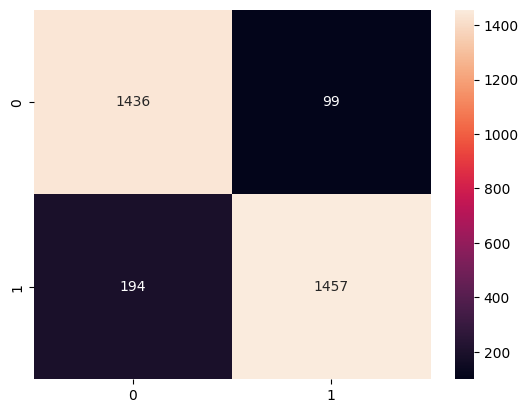

In [87]:
y_pred=cat.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d');
print(classification_report(y_test,y_pred))

Catboost is the last of the algorithms used. It is another gradient boosting algorithm. It builds an ensemble of trees after each iteration. Each new tree corrects the errors of the previous tree. This ensures that it constantly learns and gets new information after each iteration. It's accuracy is similar to both XGBoost and LightGBM at 0.9.

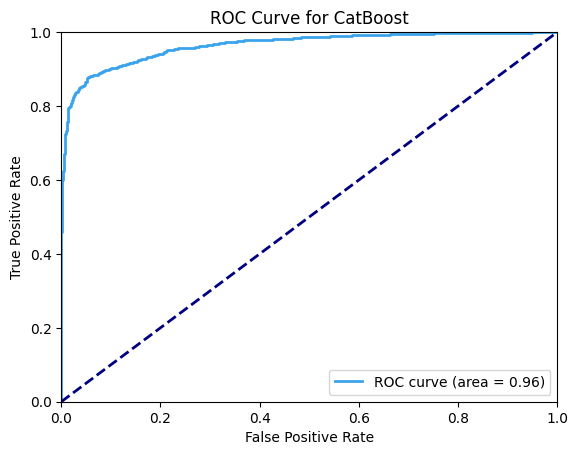

In [89]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = cat.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#3ba3ec', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost')
plt.legend(loc = "lower right")
plt.show()

### 3. Final Comparison

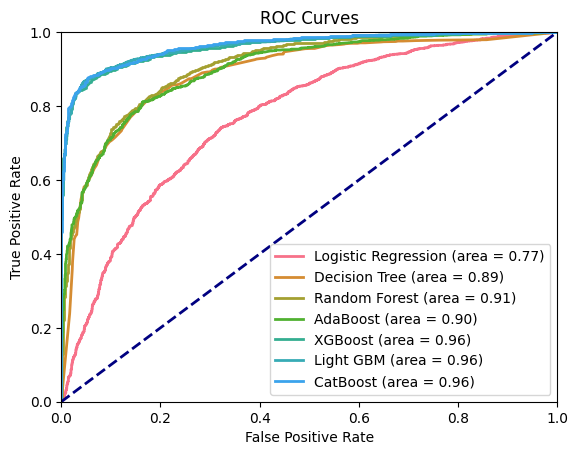

In [90]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predslr = lrmodel.predict_proba(X_test)[:,1]
predsdt = dtmodel.predict_proba(X_test)[:,1]
predsrf = rfmodel.predict_proba(X_test)[:,1]
predsada = ada.predict_proba(X_test)[:,1]
predsxgb = xgb.predict_proba(X_test)[:,1]
predslgbm = lgbm.predict_proba(X_test)[:,1]
predscat = cat.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)
fprdt, tprdt, _ = metrics.roc_curve(y_test, predsdt)
fprrf, tprrf, _ = metrics.roc_curve(y_test, predsrf)
fprada, tprada, _ = metrics.roc_curve(y_test, predsada)
fprxgb, tprxgb, _ = metrics.roc_curve(y_test, predsxgb)
fprlgbm, tprlgbm, _ = metrics.roc_curve(y_test, predslgbm)
fprcat, tprcat, _ = metrics.roc_curve(y_test, predscat)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auclr = metrics.auc(fprlr, tprlr)
roc_aucdt = metrics.auc(fprdt, tprdt)
roc_aucrf = metrics.auc(fprrf, tprrf)
roc_aucada = metrics.auc(fprada, tprada)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
roc_auclgbm = metrics.auc(fprlgbm, tprlgbm)
roc_auccat = metrics.auc(fprcat, tprcat)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fprlr, tprlr, color='#f77189', lw = lw, label = 'Logistic Regression (area = %0.2f)' % roc_auclr)
plt.plot(fprdt, tprdt, color='#d58c32', lw = lw, label = 'Decision Tree (area = %0.2f)' % roc_aucdt)
plt.plot(fprrf, tprrf, color='#a4a031', lw = lw, label = 'Random Forest (area = %0.2f)' % roc_aucrf)
plt.plot(fprada, tprada, color='#50b131', lw = lw, label = 'AdaBoost (area = %0.2f)' % roc_aucada)
plt.plot(fprxgb, tprxgb, color='#34ae91', lw = lw, label = 'XGBoost (area = %0.2f)' % roc_aucxgb)
plt.plot(fprlgbm, tprlgbm, color='#37abb5', lw = lw, label = 'Light GBM (area = %0.2f)' % roc_auclgbm)
plt.plot(fprcat, tprcat, color='#3ba3ec', lw = lw, label = 'CatBoost (area = %0.2f)' % roc_auccat)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = "lower right")
plt.show()

When comparing all algorithms, the gradient boosting algorithms have overall better performance than the rest. XGBoost, LightGBM and Catboost have a similar AUC of 0.96. They perform relatively better than the other algorithms.

To conclude, all the gradient boosting algorithms appear to perform better than the rest. In an unbalanced dataset, as long as SMOTE is first used to balanced the data, generally all the algorithms have relatively good performance. If the datasets are larger and more complex, there may be a case to use Random Forest instead as the parameter tuning helps to determine better parameters for the models.